# Python For Scientific Programming

Python is extremely popular for scientific computing, because:

- it's accessible and flexible,

- the huge range of high quality scientific libraries now available,

- it's open source,

- the popular Anaconda Python distribution, which simplifies installation and management of those libraries, and

- the recent surge of interest in using Python for machine learning and artificial intelligence.

So, for this lecture, let's see these libraries.



## Scientific Libraries
Let’s briefly review Python’s scientific libraries, starting with why we need them.

One obvious reason we use scientific libraries is because they implement routines/procedures that assists us to reach our purposes. For example, it’s almost always more convenient to use an existing function for root computation than to write a new one from scratch.

But this is not the only reason that we use Python’s scientific libraries. Another is that pure Python, while flexible and elegant, is not fast. So we need libraries that are designed to accelerate execution of Python code. As we’ll see below, there are now Python libraries that can do this extremely well.

In terms of popularity, the big four in the world of scientific Python libraries are

- NumPy

- SciPy

- Matplotlib

- Pandas

For us, there’s another (relatively new) library that will also be essential for numerical computing:

- Numba

What are their functions ?

- NumPy forms the foundations by providing a basic array data type (think of vectors and matrices) and functions for acting on these arrays (e.g., matrix multiplication).

- SciPy builds on NumPy by adding the kinds of numerical methods that are routinely used in science (interpolation, optimization, root finding, etc.).

- Matplotlib is used to generate figures, with a focus on plotting data stored in NumPy arrays.

- Pandas provides types and functions for empirical work (e.g., manipulating data).

- Numba accelerates execution via JIT compilation — we’ll learn about this soon.

## Numpy

NumPy is a first-rate library for numerical programming

- Widely used in academia, finance and industry.

- Mature, fast, stable and under continuous development.

References: [Official Numpy Documentation](https://numpy.org/doc/stable/reference/)

### Numpy Arrays

The essential problem that NumPy solves is fast array processing.

The most important structure that NumPy defines is an array data type formally called a numpy.ndarray.

NumPy arrays power a large proportion of the scientific Python ecosystem.

Let’s first import the library.

In [27]:
import numpy as np

To create a NumPy array containing only zeros we use np.zeros

In [ ]:
a = np.zeros(3)
a

In [ ]:
type(a)

NumPy arrays are somewhat like native Python lists, except that

Data must be homogeneous (all elements of the same type).

These types must be one of the data types (dtypes) provided by NumPy.

The most important of these dtypes are:

- float64: 64 bit floating-point number

- int64: 64 bit integer

- bool: 8 bit True or False

There are also dtypes to represent complex numbers, unsigned integers, etc.

On modern machines, the default dtype for arrays is float64

In [ ]:
a = np.zeros(3)
type(a[0])

In [ ]:
a = np.zeros(3, dtype=int) ## if you want integers
type(a[0])

$\textbf{Creat an Array}$ As we’ve seen, the np.zeros function creates an array of zeros. You can probably guess what np.ones creates. Related is np.empty, which creates arrays in memory that can later be populated with data

For example, we can set up a grid of evenly spaced numbers use

In [ ]:
import numpy as np
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

To create an identity matrix use either

In [ ]:
z = np.identity(3)
z

or you can use

In [ ]:
z=np.eye(3)
z

To create lists:

In [ ]:
z = np.array([[1,2,0], [3,4,2],[5,6,9]])         # array from a list of lists
z
y = np.array([[2],[4],[6]])
a=np.matmul(z,y)
a

We can also index an array:

In [ ]:
b=a[1,0]
b

In [ ]:
z[:,0]
z[0,:]

### Broadcasting

In element-wise operations, arrays may not have the same shape.

When this happens, NumPy will automatically expand arrays to the same shape whenever possible.

This useful (but sometimes confusing) feature in NumPy is called broadcasting.

The value of broadcasting is that

- for-loops can be avoided, which helps numerical code run fast and

- broadcasting can allow us to implement operations on arrays without actually creating some dimensions of these arrays in memory, which can be important when arrays are large.

For example:

In [ ]:
a = np.array(
        [[1, 2, 3], 
         [4, 5, 6], 
         [7, 8, 9]])
b = np.array([3, 6, 9])

a + b

In [ ]:
b.shape = (3, 1)

a + b

In [ ]:
a = np.array([3, 6, 9])
b = np.array([2, 3, 4])
b.shape = (3, 1)

a + b

While broadcasting is very useful, it can sometimes seem confusing.

In [ ]:
a = np.array(
      [[1, 2],
       [4, 5],
       [7, 8]])
b = np.array([3, 6, 9])

a + b

## Scipy

SciPy builds on top of NumPy to provide common tools for scientific programming such as

- linear algebra

- numerical integration

- interpolation

- optimization

- distributions and random number generation

- signal processing

etc., etc

Like NumPy, SciPy is stable, mature and widely used.

Many SciPy routines are thin wrappers around industry-standard Fortran libraries such as LAPACK, BLAS, etc.

It’s not really necessary to “learn” SciPy as a whole.

A more common approach is to get some idea of what’s in the library and then look up documentation as required.

We explore some of the functions of this package

### Stats

The scipy.stats subpackage supplies

- numerous random variable objects (densities, cumulative distributions, random sampling, etc.)

- some estimation procedures

- some statistical tests

In [ ]:
np.random.beta(5, 5, size=3)

This generates a draw from the distribution with the density function below when $a, b = 5, 5$:
\begin{equation*}
f(x;a,b)=\frac{x^{a-1}(1-x)^{b-1}}{\int_0^1 u^{a-1}(1-u)^{b-1} du}
\end{equation*}

with $0\leq x\leq 1$. We can also use scipy.stats to reach this

In [ ]:
%matplotlib inline
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

### Roots and Fixed Points

When we plot this function:

\begin{equation}
f(x)=\sin(4(x-1/4))+x+x^{20}-1
\end{equation}
with $x\in[0,1]$, we can get

In [ ]:
f = lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1
x = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='$f(x)$')
ax.axhline(ls='--', c='k')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$f(x)$', fontsize=12)
ax.legend(fontsize=12)
plt.show()

The unique root is $0.408$
One of the most common algorithms for numerical root-finding is bisection.

To understand the idea, recall the well-known game where

Player A thinks of a secret number between 1 and 100

Player B asks if it’s less than 50

If yes, B asks if it’s less than 25

If no, B asks if it’s less than 75

And so on.

This is bisection.

Here’s a simplistic implementation of the algorithm in Python.

In [ ]:
from scipy.optimize import bisect

bisect(f, 0, 1)

In [ ]:
from scipy.optimize import newton
newton(f, 0.2) 

Pay attention to the initial condition

In [ ]:
newton(f, 0.7)   # Start the search at x = 0.7 instead

### Optimization

Most numerical packages provide only functions for minimization.

Maximization can be performed by recalling that the maximizer of a function $f$ on domain $D$ is the minimizer of $-f$ on $D$.

Minimization is closely related to root-finding: For smooth functions, interior optima correspond to roots of the first derivative.

The speed/robustness trade-off described above is present with numerical optimization too.

Unless you have some prior information you can exploit, it’s usually best to use hybrid methods.

For constrained, univariate (i.e., scalar) minimization, a good hybrid option is fminbound

In [ ]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

## Pandas

Pandas is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise of fields such as data science and machine learning.

Just as NumPy provides the basic array data type plus core array operations, pandas defines fundamental structures for working with data and endows them with methods that facilitate operations such as

- reading in data

- adjusting indices

- working with dates and time series

- sorting, grouping, re-ordering and general data munging 1

- dealing with missing values, etc., etc.

More sophisticated statistical functionality is left to other packages, such as statsmodels and scikit-learn, which are built on top of pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have taken place


In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

### Series

Let’s start with Series.

We begin by creating a series of four random observations

In [ ]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

In [ ]:
s.describe()

In [ ]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'TwT']
s

In [ ]:
s['AAPL']

In [ ]:
s['AMZN'] = 0
s

### DataFrames

While a Series is a single column of data, a DataFrame is several columns, one for each variable.

In essence, a DataFrame in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized into rows and columns, often with descriptive indexes for individual rows and individual columns.

In [29]:
data=pd.read_csv("Dropbox (横浜国立大学市国際社会科学府)/Statistics/PWT.csv")
type(data)
data

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
0,Afghanistan,AFG,2009,25390.062,4.874000e+01,33570.254520,92.298651,15.360678
1,Albania,ALB,2009,2983.000,9.581000e+01,21515.528420,82.282732,7.955745
2,Algeria,DZA,2009,34178.000,7.273000e+01,205085.382700,48.147621,17.140463
3,Angola,AGO,2009,12799.000,8.940000e+01,68024.013460,45.440834,19.548025
4,Antigua and Barbuda,ATG,2009,85.700,2.700000e+00,1462.428571,30.632084,43.396206
...,...,...,...,...,...,...,...,...
185,Venezuela,VEN,2009,27191.090,2.150000e+00,267484.786500,72.536134,5.463857
186,Vietnam,VNM,2009,88577.000,1.794100e+04,287744.030000,60.442732,10.170750
187,Yemen,YEM,2009,22858.000,2.073200e+02,61288.814890,78.498998,8.705068
188,Zambia,ZMB,2009,13061.000,4.640560e+03,30400.072730,66.427419,10.472434


We can select data by position:

In [30]:
data[2:7]

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
2,Algeria,DZA,2009,34178.0,72.73,205085.382700,48.147621,17.140463
3,Angola,AGO,2009,12799.0,89.40,68024.013460,45.440834,19.548025
4,Antigua and Barbuda,ATG,2009,85.7,2.70,1462.428571,30.632084,43.396206
5,Argentina,ARG,2009,40914.0,3.78,556944.320900,67.492274,5.371853
6,Armenia,ARM,2009,2967.0,377.89,16747.522870,97.187895,6.829332


In [31]:
data[['country', 'tcgdp']]

,country,tcgdp
0,Afghanistan,33570.254520
1,Albania,21515.528420
2,Algeria,205085.382700
3,Angola,68024.013460
4,Antigua and Barbuda,1462.428571
...,...,...
185,Venezuela,267484.786500
186,Vietnam,287744.030000
187,Yemen,61288.814890
188,Zambia,30400.072730


In [32]:
data.loc[data.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,Algeria,205085.382700
3,Angola,68024.013460
4,Antigua and Barbuda,1462.428571


Instead of indexing rows and columns using integers and names, we can also obtain a sub-dataframe of our interests that satisfies certain (potentially complicated) conditions.

This section demonstrates various ways to do that.

In [33]:
data[data.POP >= 20000]

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
0,Afghanistan,AFG,2009,25390.062,48.740000,3.357025e+04,92.298651,15.360678
2,Algeria,DZA,2009,34178.000,72.730000,2.050854e+05,48.147621,17.140463
5,Argentina,ARG,2009,40914.000,3.780000,5.569443e+05,67.492274,5.371853
7,Australia,AUS,2009,21263.000,1.110000,1.011392e+06,60.575290,9.323174
12,Bangladesh,BGD,2009,153700.000,69.270000,2.284352e+05,75.988894,4.342839
23,Brazil,BRA,2009,198739.000,1.740000,2.090966e+06,74.087622,9.304013
30,Canada,CAN,2009,33487.000,1.050000,1.340246e+06,71.008040,9.248453
35,China Version 1,CHN,2009,1323592.000,6.830000,1.073933e+07,32.206844,15.709862
36,China Version 2,CH2,2009,1323592.000,6.830000,1.134246e+07,39.631962,15.647120
37,Colombia,COL,2009,43677.000,2044.230000,3.727703e+05,71.096134,6.934471


In [34]:
data[(data.country.isin(['Argentina', 'India', 'South Africa'])) & (data.POP > 45000)]

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
77,India,IND,2009,1156898.0,46.680,4.150974e+06,60.704596,12.911375
154,South Africa,ZAF,2009,49052.0,8.412,4.241603e+05,70.796242,6.340860


In [35]:
data.loc[data.cc == max(data.cc)]

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
97,Liberia,LBR,2009,3583.0,1.0,1523.011103,192.393975,7.355831


Another widely used Pandas method is `df.apply()`

It applies a function to each row/column and returns a series.

This function can be some built-in functions like the `max` function, a `lambda` function, or a user-defined function.

Here is an example using the `max` function


In [36]:
data[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year     2.009000e+03
POP      1.323592e+06
XRAT     1.400000e+17
tcgdp    1.400378e+07
cc       1.923940e+02
cg       6.662301e+01
dtype: float64

`lambda` function is often used with `df.apply()` method. A trivial example is to return itself for each row in the dataframe

In [37]:
data.apply(lambda row: row, axis=1)

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
0,Afghanistan,AFG,2009,25390.062,4.874000e+01,33570.254520,92.298651,15.360678
1,Albania,ALB,2009,2983.000,9.581000e+01,21515.528420,82.282732,7.955745
2,Algeria,DZA,2009,34178.000,7.273000e+01,205085.382700,48.147621,17.140463
3,Angola,AGO,2009,12799.000,8.940000e+01,68024.013460,45.440834,19.548025
4,Antigua and Barbuda,ATG,2009,85.700,2.700000e+00,1462.428571,30.632084,43.396206
...,...,...,...,...,...,...,...,...
185,Venezuela,VEN,2009,27191.090,2.150000e+00,267484.786500,72.536134,5.463857
186,Vietnam,VNM,2009,88577.000,1.794100e+04,287744.030000,60.442732,10.170750
187,Yemen,YEM,2009,22858.000,2.073200e+02,61288.814890,78.498998,8.705068
188,Zambia,ZMB,2009,13061.000,4.640560e+03,30400.072730,66.427419,10.472434


In [38]:
complexCondition = data.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000, 
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']
data.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Albania,2009,2983.0,9.581000e+01,21515.528420
3,Angola,2009,12799.0,8.940000e+01,68024.013460
4,Antigua and Barbuda,2009,85.7,2.700000e+00,1462.428571
5,Argentina,2009,40914.0,3.780000e+00,556944.320900
6,Armenia,2009,2967.0,3.778900e+02,16747.522870
...,...,...,...,...,...
179,United Arab Emirates,2009,4798.0,3.672507e+00,316017.170100
182,Uruguay,2009,3294.0,1.963000e+01,40855.871160
184,Vanuatu,2009,219.0,9.793000e+01,1600.630768
188,Zambia,2009,13061.0,4.640560e+03,30400.072730


The ability to make changes in dataframes is important to generate a clean dataset for future analysis. We can use `df.where()` conveniently to “keep” the rows we have selected and replace the rest rows with any other values

In [39]:
data.where(data.POP >= 20000, False)

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
0,Afghanistan,AFG,2009,25390.062,48.74,33570.25452,92.298651,15.360678
1,False,False,False,False,False,False,False,False
2,Algeria,DZA,2009,34178.0,72.73,205085.3827,48.147621,17.140463
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
185,Venezuela,VEN,2009,27191.09,2.15,267484.7865,72.536134,5.463857
186,Vietnam,VNM,2009,88577.0,17941.0,287744.03,60.442732,10.17075
187,Yemen,YEM,2009,22858.0,207.32,61288.81489,78.498998,8.705068
188,False,False,False,False,False,False,False,False


We can simply use `.loc[]` to specify the column that we want to modify, and assign values

In [40]:
data.loc[data.cg >=12, 'cg'] = np.nan
data

,country,isocode,year,POP,XRAT,tcgdp,cc,cg
0,Afghanistan,AFG,2009,25390.062,4.874000e+01,33570.254520,92.298651,NaN
1,Albania,ALB,2009,2983.000,9.581000e+01,21515.528420,82.282732,7.955745
2,Algeria,DZA,2009,34178.000,7.273000e+01,205085.382700,48.147621,NaN
3,Angola,AGO,2009,12799.000,8.940000e+01,68024.013460,45.440834,NaN
4,Antigua and Barbuda,ATG,2009,85.700,2.700000e+00,1462.428571,30.632084,NaN
...,...,...,...,...,...,...,...,...
185,Venezuela,VEN,2009,27191.090,2.150000e+00,267484.786500,72.536134,5.463857
186,Vietnam,VNM,2009,88577.000,1.794100e+04,287744.030000,60.442732,10.170750
187,Yemen,YEM,2009,22858.000,2.073200e+02,61288.814890,78.498998,8.705068
188,Zambia,ZMB,2009,13061.000,4.640560e+03,30400.072730,66.427419,10.472434


### Visualization

Let’s imagine that we’re only interested in the population (POP) and total GDP (tcgdp).

One way to strip the data frame df down to only these variables is to overwrite the dataframe using the selection method described above

In [41]:
data = data[['country', 'POP', 'tcgdp']]
data

,country,POP,tcgdp
0,Afghanistan,25390.062,33570.254520
1,Albania,2983.000,21515.528420
2,Algeria,34178.000,205085.382700
3,Angola,12799.000,68024.013460
4,Antigua and Barbuda,85.700,1462.428571
...,...,...,...
185,Venezuela,27191.090,267484.786500
186,Vietnam,88577.000,287744.030000
187,Yemen,22858.000,61288.814890
188,Zambia,13061.000,30400.072730


Here the index 0, 1,..., 7 is redundant because we can use the country names as an index.

To do this, we set the index to be the country variable in the dataframe

In [42]:
data = data.set_index('country')
data

,POP,tcgdp
country,,
Afghanistan,25390.062,33570.254520
Albania,2983.000,21515.528420
Algeria,34178.000,205085.382700
Angola,12799.000,68024.013460
Antigua and Barbuda,85.700,1462.428571
...,...,...
Venezuela,27191.090,267484.786500
Vietnam,88577.000,287744.030000
Yemen,22858.000,61288.814890


Let’s give the columns slightly better names

In [43]:
data.columns = 'population', 'total GDP'
data

,population,total GDP
country,,
Afghanistan,25390.062,33570.254520
Albania,2983.000,21515.528420
Algeria,34178.000,205085.382700
Angola,12799.000,68024.013460
Antigua and Barbuda,85.700,1462.428571
...,...,...
Venezuela,27191.090,267484.786500
Vietnam,88577.000,287744.030000
Yemen,22858.000,61288.814890


Let's compute GDP per capita

In [44]:
data['population'] = data['population'] * 1e3
data['GDP percap'] = data['total GDP'] * 1e6 / data['population']
data

,population,total GDP,GDP percap
country,,,
Afghanistan,25390062.0,33570.254520,1322.180880
Albania,2983000.0,21515.528420,7212.714858
Algeria,34178000.0,205085.382700,6000.508593
Angola,12799000.0,68024.013460,5314.791270
Antigua and Barbuda,85700.0,1462.428571,17064.510747
...,...,...,...
Venezuela,27191090.0,267484.786500,9837.221917
Vietnam,88577000.0,287744.030000,3248.518577
Yemen,22858000.0,61288.814890,2681.285103


In [45]:
data = data.sort_values(by='GDP percap', ascending=False)
data

,population,total GDP,GDP percap
country,,,
Qatar,833000.0,118238.125400,141942.527491
Luxembourg,491000.0,45853.317040,93387.611079
United Arab Emirates,4798000.0,316017.170100,65864.353918
Brunei,388000.0,24187.804030,62339.701108
Bermuda,67800.0,3925.385430,57896.540265
...,...,...,...
Somalia,9613000.0,4918.563533,511.657498
Liberia,3583000.0,1523.011103,425.065895
Burundi,9511000.0,3906.532931,410.738401


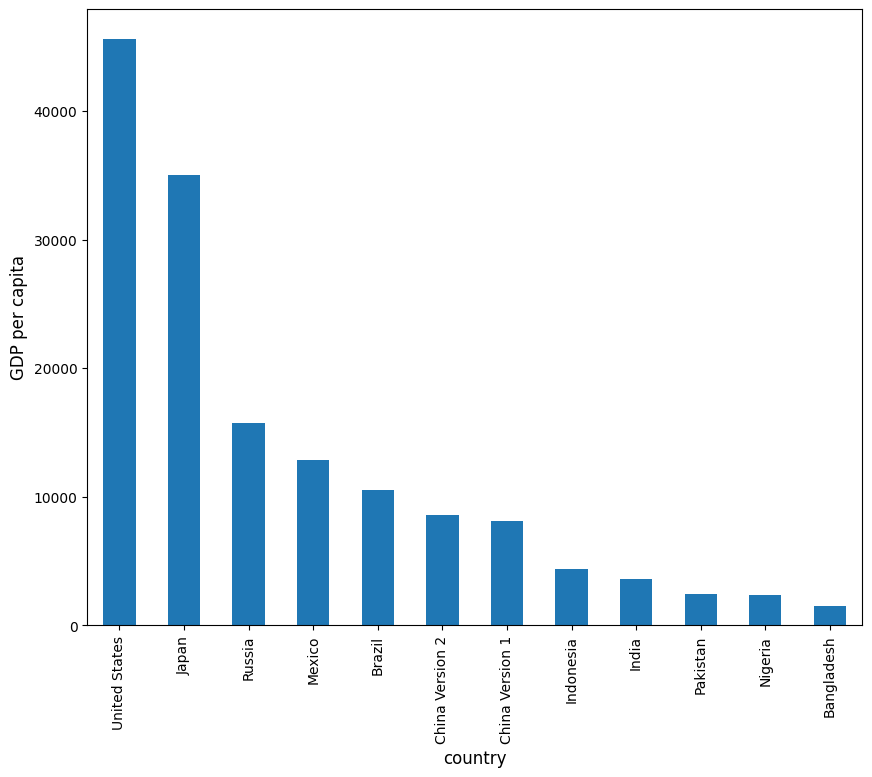

In [57]:
data1=data[data.population >= 100000000]
ax = data1['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

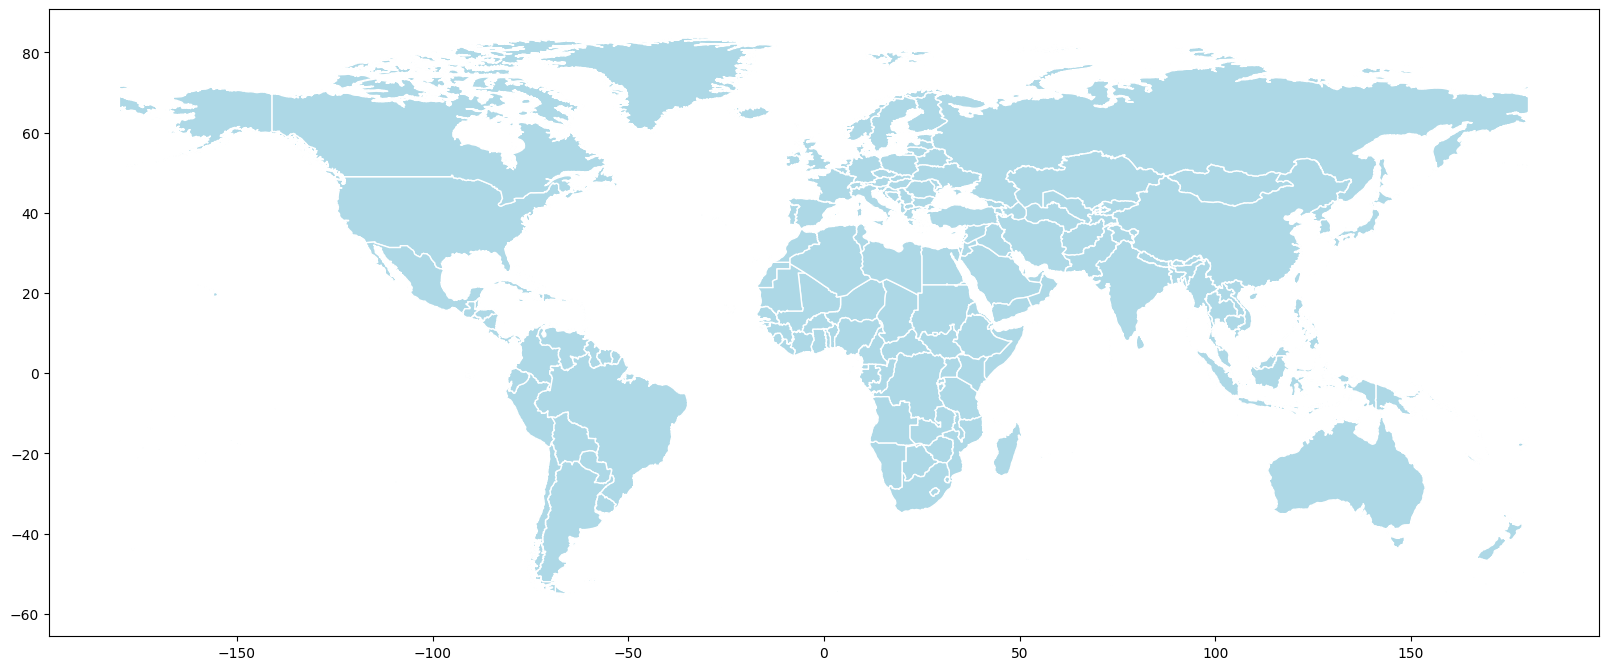

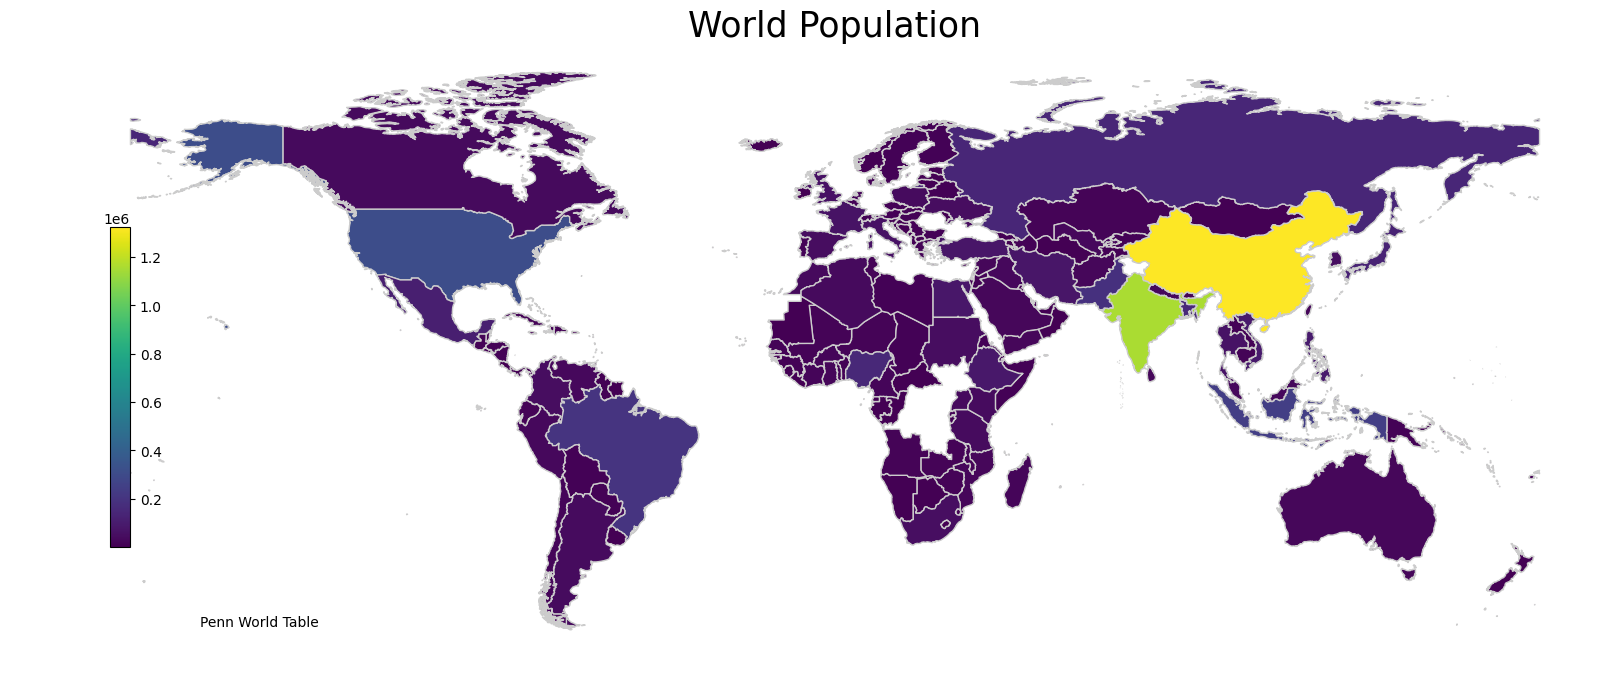

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import json

##read data
data=pd.read_csv("Dropbox (横浜国立大学市国際社会科学府)/Statistics/PWT.csv")

# Setting the path to the shapefile
SHAPEFILE = 'Dropbox (横浜国立大学市国際社会科学府)/Statistics/world-administrative-boundaries/world-administrative-boundaries.shp'

# Read shapefile using Geopandas
geo_df = gpd.read_file(SHAPEFILE)[['iso3', 'name', 'geometry']]

# Rename columns.
geo_df.columns = ['country_code', 'country', 'geometry']
geo_df.head(3)

# Drop row for 'Antarctica'. It takes a lot of space in the map and is not of much use
geo_df = geo_df.drop(geo_df.loc[geo_df['country'] == 'Antarctica'].index)

# Print the map
geo_df.plot(figsize=(20, 20), edgecolor='white', linewidth=1, color='lightblue')

# Merge the two dataframes
merged_df = pd.merge(left=geo_df, right=data, how='left', left_on='country_code', right_on='isocode')


# Print the map
# Set the range for the choropleth
title = 'World Population'
col = 'POP'
source = 'Penn World Table'
vmin = merged_df[col].min()
vmax = merged_df[col].max()
cmap = 'viridis'

# Create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(20, 8))

# Remove the axis
ax.axis('off')
merged_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)

# Add a title
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})

# Create an annotation for the data source
ax.annotate(source, xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
            verticalalignment='bottom', fontsize=10)
            
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)

# Empty array for the data range
sm._A = []

# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)